In [1]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
spam = np.genfromtxt('Spam data/spam.data', delimiter=' ')
x, testx, y, testy = train_test_split(spam[:,:-1], spam[:,-1], test_size=227, random_state=123)

In [3]:
estimator = DecisionTreeClassifier()
estimator.fit(x, y)
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

In [4]:
# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True
print()
print(np.max(node_depth))



28


In [5]:
tree = tree.export_graphviz(estimator, out_file='tree.dot') 

In [6]:
misclassification = []
#n_leafs = []
for i in range(2,40):
    clf = DecisionTreeClassifier(max_leaf_nodes = i)
    clf.fit(x,y)
    yhat = clf.predict(testx)
    misclassification.append(1-accuracy_score(testy, yhat))
    #n_leafs.append(clf.tree_.leaf_count)

In [7]:
misclassification_min_samples_leaf = []
#n_leafs = []
for i in range(1,200):
    clf = DecisionTreeClassifier(min_samples_leaf = i)
    clf.fit(x,y)
    yhat = clf.predict(x)
    misclassification_min_samples_leaf.append(1-accuracy_score(y, yhat))
    #n_leafs.append(clf.tree_.leaf_count)

In [8]:
import matplotlib.pyplot as plt

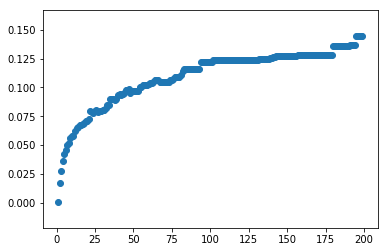

In [9]:
plt.scatter(range(1,200),misclassification_min_samples_leaf)

In [10]:
misclassification_max_depth_train = []
misclassification_max_depth_test = []
#n_leafs = []
for i in range(1,50):
    clf = DecisionTreeClassifier(max_depth = i)
    clf.fit(x,y)
    yhat = clf.predict(x)
    ypred = clf.predict(testx)
    misclassification_max_depth_train.append(1-accuracy_score(y, yhat))
    misclassification_max_depth_test.append(1-accuracy_score(testy, ypred))
    
    #n_leafs.append(clf.tree_.leaf_count)

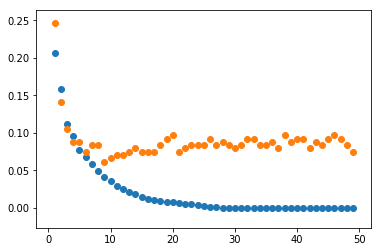

In [11]:
plt.scatter(range(1,50),misclassification_max_depth_train)
plt.scatter(range(1,50),misclassification_max_depth_test)


In [12]:
misclassification_max_depth = []
#n_leafs = []
for i in range(1,50):
    clf = DecisionTreeClassifier(max_depth = i)
    clf.fit(x,y)
    yhat = clf.predict(x)
    misclassification_max_depth.append(1-accuracy_score(y, yhat))
    #n_leafs.append(clf.tree_.leaf_count)

In [13]:
x.shape

(4374, 57)

In [14]:
x[:,0]

array([0.  , 1.  , 0.  , ..., 0.73, 0.  , 0.  ])

In [15]:
sum(y==1)/len(y)*(1-sum(y==1)/len(y)) + sum(y==0)/len(y)*(1-sum(y==0)/len(y))

0.47739636196680346

In [16]:
ypred_ = []
for i in range(len(y)):
    if x[i,51]<=0.0795:
        ypred = 1
    else:
        ypred = 0
    ypred_.append(ypred)    

In [17]:
ypred_=np.array(ypred_)

In [18]:
(sum(y[ypred_==1]==1)/len(y[ypred_==1])*(1-sum(y[ypred_==1]==1)/len(y[ypred_==1]))) + (sum(y[ypred_==0]==1)/len(y[ypred_==0])*(1-sum(y[ypred_==0]==1)/len(y[ypred_==0])))

0.3313002084984923